In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import ROOT

In [23]:
# path = '/home/grabanal/WVZ/gabriel_ML_data/'
path = '/home/grabanal/minitree/'
# identifier = '20220117_iso_e4m1_'
identifier = '20220126_iso_e4m1_'
identifier = '20220210_iso_e4m1_'


# identifier = '20220217_0pt_best_iso_'

# identifier = '20220215_nobtag_iso_e4m1_'
identifier = '20220220_best_iso_'
identifier = '20220223_0btag_best_iso_'

# identifier = '20220301_ELReLMIs54_MUReLMIs31_nobtag_'
identifier = '20220301_ELReLMIs54_MUReLMIs31_btag77_'


identifier = '20220301_ELReLLIs00_MUReLLIs00_btag77_nochargesum_' # not useful
identifier = '20220301_ELReLMIs54_MUReLMIs31_btag77_nochargesum_'



# subset = '_TEST'
subset = ''
VVZ     = pd.read_feather('{}{}VVZ{}.arrow'.format(path, identifier, subset))
ZZ       = pd.read_feather('{}{}ZZ{}.arrow'.format(path, identifier, subset))
WZ       = pd.read_feather('{}{}WZ{}.arrow'.format(path, identifier, subset))
Zjets  = pd.read_feather('{}{}Zjets{}.arrow'.format(path, identifier, subset))
Zgamma = pd.read_feather('{}{}Zgamma{}.arrow'.format(path, identifier, subset))
ttZ    = pd.read_feather('{}{}ttZ{}.arrow'.format(path, identifier, subset))
tZ     = pd.read_feather('{}{}tZ{}.arrow'.format(path, identifier, subset))
tWZ    = pd.read_feather('{}{}tWZ{}.arrow'.format(path, identifier, subset))
others = pd.read_feather('{}{}others{}.arrow'.format(path, identifier, subset))
FULLBG = pd.read_feather('{}{}FULLBG{}.arrow'.format(path, identifier, subset))


# PARTIALBG = pd.read_feather('/home/grabanal/minitree/PARTIALBG_2021_11_19_iso_e4m1.arrow')
# individual_backgrounds = [ZZ, WZ, Zjets_new, Zgamma, ttZ, tZ, tWZ, others]
# FULLBG = pd.read_feather('/home/grabanal/minitree/FULLBG_2021_11_11_no_iso.arrow')

order = [others, tZ, tWZ, ttZ, Zgamma, WZ, Zjets, ZZ]
# order = [FULLBG]

In [3]:
variable_SR = 2

VVZ = VVZ[VVZ.SR == variable_SR]
FULLBG = FULLBG[FULLBG.SR == variable_SR]
for item in order:
    item = item[item.SR == variable_SR]

In [31]:
vvz_yield = sum(VVZ['wgt'])
vvz_yield_error = np.sqrt( sum(VVZ['wgt']**2) )
vvz_nentries = len(VVZ['wgt'])

new_bkg_yield = sum(sum(bkg['wgt']) for bkg in order)
new_bkg_yield_error = np.sqrt( sum(sum(bkg['wgt']**2) for bkg in order) )
new_nentries = sum(len(bkg['wgt']) for bkg in order)

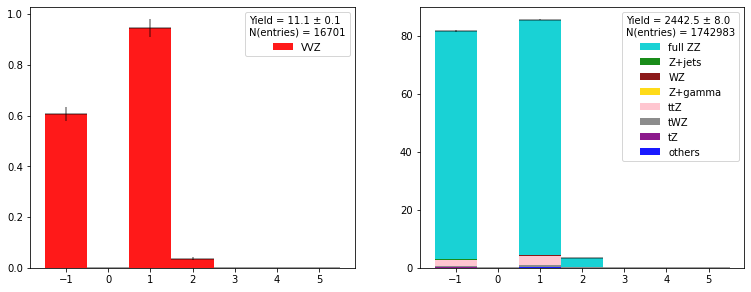

In [5]:
plt.figure(figsize=[2*6.4,1*4.8])

# variable, denom, my_range, my_bins = 'SR', 1, (-0.5,2.5), 3

variable, denom, my_range, my_bins = 'Njet', 1, (-0.5,10.5), 11
# variable, denom, my_range, my_bins = 'METSig', 1, (0,20), 20
# variable, denom, my_range, my_bins = 'mass_4l', 1000, (0,800), 40
# variable, denom, my_range, my_bins = 'HT', 1, (0,300), 60
# variable, denom, my_range, my_bins = 'Zlep1_pt', 1000, (0,300), 60
# variable, denom, my_range, my_bins = 'Zlep2_pt', 1000, (0,300), 60
# variable, denom, my_range, my_bins = 'Wlep1_pt', 1000, (0,300), 60
# variable, denom, my_range, my_bins = 'Wlep2_pt', 1000, (0,300), 60
# variable, denom, my_range, my_bins = 'Zlep1_pid', 1, (-13.5,13.5), 27
# variable, denom, my_range, my_bins = 'Zlep2_pid', 1, (-13.5,13.5), 27
# variable, denom, my_range, my_bins = 'Zlep1_dphi', 1, (-3.5,3.5), 50
# variable, denom, my_range, my_bins = 'Zlep2_dphi', 1, (-3.5,3.5), 50
# variable, denom, my_range, my_bins = 'Wlep1_dphi', 1, (-3.5,3.5), 50
# variable, denom, my_range, my_bins = 'Wlep2_dphi', 1, (-3.5,3.5), 50

# variable, denom, my_range, my_bins = 'Wlep1_pid', 1, (-13.5,13.5), 27
# variable, denom, my_range, my_bins = 'Wlep2_pid', 1, (-13.5,13.5), 27
# variable, denom, my_range, my_bins = 'leptonic_HT', 1000, (0,600), 120

variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_4', 1, (-1.5,5.5), 7, False



my_alpha = 0.9
my_log = False

ax = plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(VVZ[variable]/denom, weights=VVZ['wgt'], range=my_range,
                            bins=my_bins, alpha=my_alpha, color='red', label='VVZ')
# to get sumw2:
sumw2, _ = np.histogram(VVZ[variable]/denom, weights=VVZ['wgt']**2, range=my_range, bins=my_bins)
# to plot error bars:
bin_centers = (bins[:-1]+bins[1:])/2
bin_widths  = (bins[1:]-bins[:-1])/2
plt.errorbar(x=bin_centers, y=n, xerr=bin_widths, yerr=np.sqrt(sumw2), fmt=' ', color='k', alpha=0.5)
if (my_log):
    plt.yscale('log')
plt.legend(title='Yield = {:.1f} ± {:.1f}\nN(entries) = {}'.format(\
    vvz_yield, vvz_yield_error, vvz_nentries), loc='best')


ax = plt.subplot(1, 2, 2)
colors = ('blue','purple','grey','pink', 'gold', 'maroon','green','darkturquoise')
labels = ('others', 'tZ', 'tWZ', 'ttZ', 'Z+gamma', 'WZ', 'Z+jets', 'full ZZ')
n, bins, patches = plt.hist( (order[0][variable]/denom, 
                             order[1][variable]/denom,
                             order[2][variable]/denom,
                             order[3][variable]/denom,
                             order[4][variable]/denom,
                             order[5][variable]/denom,
                             order[6][variable]/denom,
                             order[7][variable]/denom),
                              weights=(order[0]['wgt'], 
                                      order[1]['wgt'], 
                                      order[2]['wgt'],
                                      order[3]['wgt'],
                                      order[4]['wgt'],
                                      order[5]['wgt'],
                                      order[6]['wgt'],
                                      order[7]['wgt']),
                            range=my_range, 
                            bins=my_bins, alpha=my_alpha, 
                            color=colors, label=labels, stacked=True)
# to get sumw2:
sumw2, _ = np.histogram(FULLBG[variable]/denom, 
                        weights=FULLBG['wgt']**2, range=my_range, bins=my_bins)
# to plot error bars:
bin_centers = (bins[:-1]+bins[1:])/2
bin_widths  = (bins[1:]-bins[:-1])/2
plt.errorbar(x=bin_centers, y=n[-1], xerr=bin_widths, yerr=np.sqrt(sumw2), fmt=' ', color='k', alpha=0.5)

if (my_log):
    plt.yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Yield = {:.1f} ± {:.1f}\nN(entries) = {}'.format(\
    new_bkg_yield, new_bkg_yield_error, new_nentries), loc='best')
# plt.legend(handles[::-1], labels[::-1], title='Line', loc="best", )
max_there = n.max()


plt.savefig('plots/this_SR{}_{}.pdf'.format(variable_SR, variable))
plt.show()


In [50]:
sum(VVZ['wgt'])

36.762996593966456

In [5]:
VVZ.columns

Index(['index', 'pt_4l', 'SR', 'Wlep1_pt', 'Zlep1_phi', 'Wlep1_pid',
       'leptonic_HT', 'Zlep2_pt', 'METSig', 'Wlep2_phi', 'chisq', 'Zlep2_phi',
       'MET', 'other_mass', 'total_HT', 'Wlep2_pid', 'Zlep1_eta', 'Wlep1_dphi',
       'Zlep1_pt', 'Zlep2_dphi', 'HT', 'wgt', 'pt_2', 'pt_4', 'pt_3',
       'Wlep1_eta', 'Wlep2_dphi', 'Zlep2_eta', 'Zcand_mass', 'pt_1', 'Njet',
       'Zlep1_dphi', 'Zlep1_pid', 'Wlep2_pt', 'Nlep', 'Wlep2_eta', 'mass_4l',
       'Zlep2_pid', 'Wlep1_phi'],
      dtype='object')

In [ ]:
['index', 'pt_4l', 'SR', 'Wlep1_pt', 'Zlep1_phi', 'Wlep1_pid',
       'leptonic_HT', 'Zlep2_pt', 'METSig', 'Wlep2_phi', 'chisq', 'Zlep2_phi',
       'MET', 'other_mass', 'total_HT', 'Wlep2_pid', 'Zlep1_eta', 'Wlep1_dphi',
       'Zlep1_pt', 'Zlep2_dphi', 'HT', 'wgt', 'pt_2', 'pt_4', 'pt_3',
       'Wlep1_eta', 'Wlep2_dphi', 'Zlep2_eta', 'Zcand_mass', 'pt_1', 'Njet',
       'Zlep1_dphi', 'Zlep1_pid', 'Wlep2_pt', 'Nlep', 'Wlep2_eta', 'mass_4l',
       'Zlep2_pid', 'Wlep1_phi'],


In [26]:
for df in [VVZ, FULLBG]:
    x = df['Wlep1_pt']*np.cos(df['Wlep1_phi']) + \
        df['Wlep2_pt']*np.cos(df['Wlep2_phi']) + \
        df['MET']*np.cos(df['METPhi'])
    y = df['Wlep1_pt']*np.sin(df['Wlep1_phi']) + \
        df['Wlep2_pt']*np.sin(df['Wlep2_phi']) + \
        df['MET']*np.sin(df['METPhi'])
    df['my_variable'] = np.sqrt(x**2 + y**2)

In [48]:
VVZ.columns

Index(['jet_eta_3', 'Zlep1_phi', 'leptonic_HT', 'Zlep2_pt', 'jet_m_2',
       'jet_pt_2', 'METSig', 'jet_eta_4', 'jet_m_3', 'Zlep2_phi', 'MET',
       'other_mass', 'jet_m_4', 'Wlep2_pid', 'jet_eta_1', 'Wlep1_dphi',
       'Zlep1_pt', 'eta_3', 'eta_4', 'jet_pt_4', 'METPhi', 'wgt', 'jet_eta_2',
       'phi_4', 'v_j_btag70', 'phi_1', 'jet_phi_2', 'jet_phi_3', 'Zlep1_dphi',
       'Zlep1_pid', 'lep4_pid', 'mass_4l', 'Zlep2_pid', 'pt_4l', 'SR',
       'Wlep1_pt', 'lep2_pid', 'Wlep1_pid', 'v_j_btag77', 'Wlep2_phi', 'chisq',
       'jet_pt_3', 'jet_m_1', 'eta_1', 'v_j_btag85', 'total_HT', 'Zlep1_eta',
       'Zlep2_dphi', 'lep3_pid', 'HT', 'pt_2', 'pt_4', 'pt_3', 'Wlep1_eta',
       'Wlep2_dphi', 'phi_3', 'Zlep2_eta', 'jet_pt_1', 'pt_1', 'jet_phi_4',
       'Njet', 'phi_2', 'Zcand_mass', 'Wlep2_eta', 'v_j_btag60', 'lep1_pid',
       'v_j_btagCont', 'Wlep2_pt', 'jet_phi_1', 'Nlep', 'Wlep1_phi', 'eta_2'],
      dtype='object')

In [6]:
jet_variables = ttZ[['v_j_btag60','v_j_btag70','v_j_btag77','v_j_btag85','v_j_btagCont']]
jet_variables.head(5)

,v_j_btag60,v_j_btag70,v_j_btag77,v_j_btag85,v_j_btagCont
0,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[1, 1, -1, 1, 1, 1, 1]"
1,"[False, False]","[False, False]","[False, False]","[False, False]","[1, 1]"
2,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[-1, 1, 1, -1, -1, -1, 1]"
3,"[False, False, False, False]","[False, False, False, False]","[False, False, False, False]","[False, False, False, False]","[1, 1, 1, 1]"
4,"[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]","[1, -1, 1, 1, -1, 1]"


In [7]:
ttZ['v_j_btagCont'][:][0]

array([ 1,  1, -1,  1,  1,  1,  1], dtype=int32)

In [15]:
np.sign(-3)

-1

In [24]:
VVZ['my_variable'] = np.sign(VVZ['lep1_pid']) + np.sign(VVZ['lep2_pid']) \
                   + np.sign(VVZ['lep3_pid']) + np.sign(VVZ['lep4_pid'])
FULLBG['my_variable'] = np.sign(FULLBG['lep1_pid']) + np.sign(FULLBG['lep2_pid']) \
                      + np.sign(FULLBG['lep3_pid']) + np.sign(FULLBG['lep4_pid'])

(array([6626.,    0., 1973.,    0.,    0.,    0.,    0., 3830.,    0.,
         418.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <BarContainer object of 10 artists>)

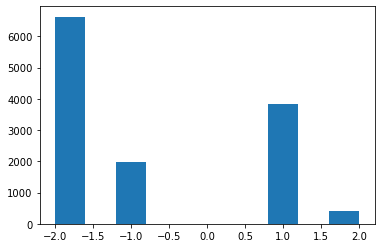

In [18]:
plt.hist(ttZ['jet_btagCont_4'])

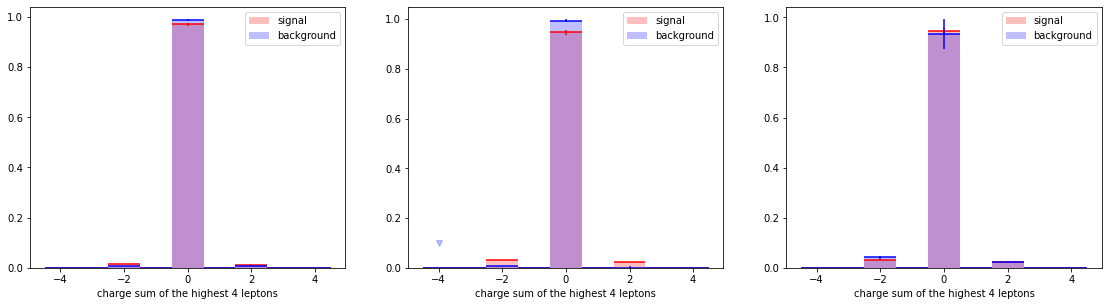

In [27]:
plt.figure(figsize=[3*6.4,1*4.8])

# variable, denom, my_range, my_bins, b_overflow = 'SR', 1, (-0.5,2.5), 3, True
variable, denom, my_range, my_bins, b_overflow = 'my_variable', 1, (-4.5,4.5), 9, False 

# variable, denom, my_range, my_bins, b_overflow = 'pt_1', 1000, (0,300), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'pt_2', 1000, (0,300), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'pt_3', 1000, (0,300), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'pt_4', 1000, (0,300), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_pid', 1, (-13.5,13.5), 27, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_pid', 1, (-13.5,13.5), 27, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_pid', 1, (-13.5,13.5), 27, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_pid', 1, (-13.5,13.5), 27, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'leptonic_HT', 1000, (0,600), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'Zcand_mass', 1000, (60,120), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'other_mass', 1000, (0,150), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'mass_4l', 1000, (0,800), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'pt_4l', 1000, (0,300), 50, True 
# variable, denom, my_range, my_bins, b_overflow = 'chisq', 1, (0,500), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'Njet', 1, (-0.5,10.5), 11, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'HT', 1000, (0,300), 50, True # Yes, already in GeV

# variable, denom, my_range, my_bins, b_overflow = 'MET', 1000, (0,200), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'METSig', 1, (0,20), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'METPhi', 1, (-3.5,3.5), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'total_HT', 1000, (0,1000), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_1', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_2', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_3', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_4', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_1', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_2', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_3', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_4', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_1', 1, (-10.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_2', 1, (-10.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_3', 1, (-10.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_4', 1, (-10.5,3.5), 50, False


# variable, denom, my_range, my_bins, b_overflow = 'm_1', 1, (0,200), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'jet_m_1', 1000, (0,20), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_m_2', 1000, (0,20), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_m_3', 1000, (0,20), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_m_4', 1000, (0,20), 20, True


# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_1', 1, (-2.5,5.5), 8, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_2', 1, (-2.5,5.5), 8, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_3', 1, (-2.5,5.5), 8, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_4', 1, (-2.5,5.5), 8, False

# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_1', 1, (-1.5,5.5), 7, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_2', 1, (-1.5,5.5), 7, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_3', 1, (-1.5,5.5), 7, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_4', 1, (-1.5,5.5), 7, False

# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep1_ambiguous',  1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep2_ambiguous',  1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep3_ambiguous',  1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep4_ambiguous',  1, (-1.5,1.5), 3, False

# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep1_ambiguous',  1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep2_ambiguous',  1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep3_ambiguous',  1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep4_ambiguous',  1, (-0.5,1.5), 2, False




my_alpha = 0.25
my_log = False

for i in [0, 1, 2]:

    
    signal     = VVZ[VVZ.SR == i].copy()
    background = FULLBG[FULLBG.SR == i].copy()
    
#     signal = signal[signal[variable] > -2].copy()
#     background = background[background[variable] > -2].copy()
    
    signal_yield = sum(signal['wgt'])
    background_yield = sum(background['wgt'])
    
    signal_yield_error     = np.sqrt(sum(signal['wgt']**2))
    background_yield_error = np.sqrt(sum(background['wgt']**2))
    
    signal_nentries     = len(signal['wgt'])
    background_nentries = len(background['wgt'])

  
    ax = plt.subplot(1, 3, i+1)

    # SIGNAL
    n, bins, _ = plt.hist(signal[variable]/denom, weights=signal['wgt']/signal_yield, range=my_range,
                                bins=my_bins, alpha=my_alpha, color='red', label='signal')
    #### get sumw2:
    sumw2, _ = np.histogram(signal[variable]/denom, weights=(signal['wgt']/signal_yield)**2, range=my_range, bins=my_bins)
    #### plot error bars:
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_widths  = (bins[1:]-bins[:-1])/2
    plt.errorbar(x=bin_centers, y=n, xerr=bin_widths, yerr=np.sqrt(sumw2), fmt=' ', color='red')
    #### overflow
    if (b_overflow):
        s = signal[variable]
        w = signal['wgt']
        overflow_scale = 1
        w_overflow = sum(w[s > my_range[1]*denom])/signal_yield/overflow_scale
        w_overflow_sumwgt = np.sqrt( sum(w[s > my_range[1]*denom]**2) )/signal_yield # implemente overflow scale
        plt.bar([bin_centers[-1]+2*bin_widths[0]*overflow_scale], [w_overflow], 
                width=2*bin_widths[0]*overflow_scale, bottom=0, color='red', alpha=my_alpha) 
        plt.errorbar(x=[bin_centers[-1]+2*bin_widths[0]*overflow_scale], y=[w_overflow], 
                     xerr=bin_widths[0], yerr=w_overflow_sumwgt, color='red') 
    #### negative values
    arrowsDn = bin_centers[n<0]
    ax.plot(arrowsDn,[0+0.1*(ax.yaxis.get_data_interval()[1])]*len(arrowsDn), 
            marker="v", color="red", linewidth=0, alpha=my_alpha)


    # BACKGROUND
    n, bins, _ = plt.hist(background[variable]/denom, weights=background['wgt']/background_yield, range=my_range,
                                bins=my_bins, alpha=my_alpha, color='blue', label='background')
    #### get sumw2:
    sumw2, _ = np.histogram(background[variable]/denom, 
                            weights=(background['wgt']/background_yield)**2, range=my_range, bins=my_bins)
    #### plot error bars:
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_widths  = (bins[1:]-bins[:-1])/2
    plt.errorbar(x=bin_centers, y=n, xerr=bin_widths, yerr=np.sqrt(sumw2), fmt=' ', color='blue')
    ### overflow:
    if (b_overflow):
        b = background[variable]
        w = background['wgt']
        overflow_scale = 1
        w_overflow = sum(w[b > my_range[1]*denom])/background_yield/overflow_scale
        w_overflow_sumwgt = np.sqrt( sum(w[b > my_range[1]*denom]**2) )/background_yield # implemente overflow scale
        plt.bar([bin_centers[-1]+2*bin_widths[0]*overflow_scale], [w_overflow], 
                width=2*bin_widths[0]*overflow_scale, bottom=0, color='blue', alpha=my_alpha) 
        plt.errorbar(x=[bin_centers[-1]+2*bin_widths[0]*overflow_scale], y=[w_overflow], 
                     xerr=bin_widths[0], yerr=w_overflow_sumwgt, color='blue') 
    ### negative values
    arrowsDn = bin_centers[n<0]
    ax.plot(arrowsDn,[0+0.1*(ax.yaxis.get_data_interval()[1])]*len(arrowsDn), 
            marker="v", color="blue", linewidth=0, alpha=my_alpha)

    
#     plt.xticks([-1,0,1,2,3,4,5])

    plt.legend()
#     plt.xlabel(variable+' '+str(my_range))

    if (my_log):
        plt.yscale('log')
#     plt.yscale('log')

    plt.ylim(0)
    plt.xlabel('charge sum of the highest 4 leptons')
#     plt.xlim(my_range)
plt.savefig('plots/x_new_comparison_{}.pdf'.format(variable))
plt.show()




# ttZ

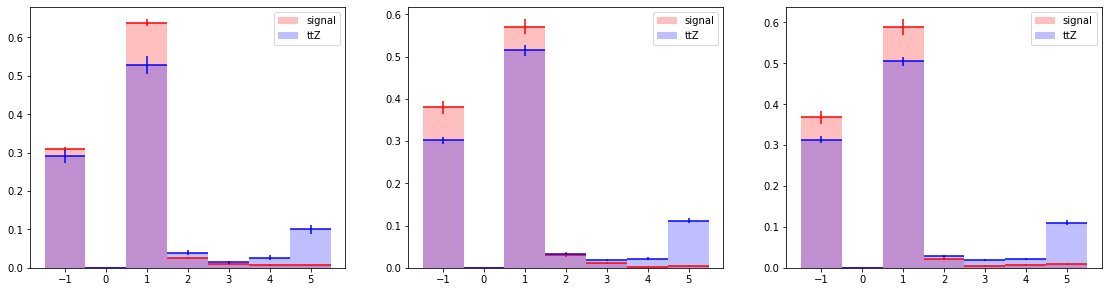

In [8]:
plt.figure(figsize=[3*6.4,1*4.8])

# variable, denom, my_range, my_bins, b_overflow = 'SR', 1, (-0.5,2.5), 3, True
# variable, denom, my_range, my_bins, b_overflow = 'my_variable', 1000, (0,500), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'pt_1', 1000, (0,300), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'pt_2', 1000, (0,300), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'pt_3', 1000, (0,300), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'pt_4', 1000, (0,300), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_pid', 1, (-13.5,13.5), 27, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_pid', 1, (-13.5,13.5), 27, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_pid', 1, (-13.5,13.5), 27, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_pid', 1, (-13.5,13.5), 27, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_pt', 1000, (0,300), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_eta', 1, (-3,3), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_phi', 1, (-3.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_dphi', 1, (-3.5,3.5), 50, False # Yes
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_mt', 1000, (0,300), 50, True 

# variable, denom, my_range, my_bins, b_overflow = 'leptonic_HT', 1000, (0,600), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'Zcand_mass', 1000, (60,120), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'other_mass', 1000, (0,150), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'mass_4l', 1000, (0,800), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'pt_4l', 1000, (0,300), 50, True 
# variable, denom, my_range, my_bins, b_overflow = 'chisq', 1, (0,500), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'Njet', 1, (-0.5,10.5), 11, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'HT', 1000, (0,300), 50, True # Yes, already in GeV

# variable, denom, my_range, my_bins, b_overflow = 'MET', 1000, (0,200), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'METSig', 1, (0,20), 50, True # Yes
# variable, denom, my_range, my_bins, b_overflow = 'METPhi', 1, (-3.5,3.5), 50, True
# variable, denom, my_range, my_bins, b_overflow = 'total_HT', 1000, (0,1000), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_1', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_2', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_3', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_pt_4', 1000, (0,100), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_1', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_2', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_3', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_eta_4', 1, (-10,5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_1', 1, (-10.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_2', 1, (-10.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_3', 1, (-10.5,3.5), 50, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_phi_4', 1, (-10.5,3.5), 50, False


# variable, denom, my_range, my_bins, b_overflow = 'm_1', 1, (0,200), 50, True

# variable, denom, my_range, my_bins, b_overflow = 'jet_m_1', 1000, (0,20), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_m_2', 1000, (0,20), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_m_3', 1000, (0,20), 20, True
# variable, denom, my_range, my_bins, b_overflow = 'jet_m_4', 1000, (0,20), 20, True


# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_1', 1, (-2.5,5.5), 8, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_2', 1, (-2.5,5.5), 8, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_3', 1, (-2.5,5.5), 8, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_4', 1, (-2.5,5.5), 8, False

# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_1', 1, (-1.5,5.5), 7, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_2', 1, (-1.5,5.5), 7, False
# variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_3', 1, (-1.5,5.5), 7, False
variable, denom, my_range, my_bins, b_overflow = 'jet_btagCont_4', 1, (-1.5,5.5), 7, False

# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_ambiguous', 1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep1_ambiguous',  1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep2_ambiguous',  1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep3_ambiguous',  1, (-1.5,1.5), 3, False
# variable, denom, my_range, my_bins, b_overflow = 'lep4_ambiguous',  1, (-1.5,1.5), 3, False

# variable, denom, my_range, my_bins, b_overflow = 'Zlep1_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'Zlep2_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep1_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'Wlep2_ambiguous', 1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep1_ambiguous',  1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep2_ambiguous',  1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep3_ambiguous',  1, (-0.5,1.5), 2, False
# variable, denom, my_range, my_bins, b_overflow = 'lep4_ambiguous',  1, (-0.5,1.5), 2, False




my_alpha = 0.25
my_log = False

for i in [0, 1, 2]:

    
    signal     = VVZ[VVZ.SR == i].copy()
    background = ttZ[ttZ.SR == i].copy()
    
    signal = signal[signal[variable] > -2].copy()
    background = background[background[variable] > -2].copy()
    
    signal_yield = sum(signal['wgt'])
    background_yield = sum(background['wgt'])
    
    signal_yield_error     = np.sqrt(sum(signal['wgt']**2))
    background_yield_error = np.sqrt(sum(background['wgt']**2))
    
    signal_nentries     = len(signal['wgt'])
    background_nentries = len(background['wgt'])

  
    ax = plt.subplot(1, 3, i+1)

    # SIGNAL
    n, bins, _ = plt.hist(signal[variable]/denom, weights=signal['wgt']/signal_yield, range=my_range,
                                bins=my_bins, alpha=my_alpha, color='red', label='signal')
    #### get sumw2:
    sumw2, _ = np.histogram(signal[variable]/denom, weights=(signal['wgt']/signal_yield)**2, range=my_range, bins=my_bins)
    #### plot error bars:
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_widths  = (bins[1:]-bins[:-1])/2
    plt.errorbar(x=bin_centers, y=n, xerr=bin_widths, yerr=np.sqrt(sumw2), fmt=' ', color='red')
    #### overflow
    if (b_overflow):
        s = signal[variable]
        w = signal['wgt']
        overflow_scale = 1
        w_overflow = sum(w[s > my_range[1]*denom])/signal_yield/overflow_scale
        w_overflow_sumwgt = np.sqrt( sum(w[s > my_range[1]*denom]**2) )/signal_yield # implemente overflow scale
        plt.bar([bin_centers[-1]+2*bin_widths[0]*overflow_scale], [w_overflow], 
                width=2*bin_widths[0]*overflow_scale, bottom=0, color='red', alpha=my_alpha) 
        plt.errorbar(x=[bin_centers[-1]+2*bin_widths[0]*overflow_scale], y=[w_overflow], 
                     xerr=bin_widths[0], yerr=w_overflow_sumwgt, color='red') 
    #### negative values
    arrowsDn = bin_centers[n<0]
    ax.plot(arrowsDn,[0+0.1*(ax.yaxis.get_data_interval()[1])]*len(arrowsDn), 
            marker="v", color="red", linewidth=0, alpha=my_alpha)


    # BACKGROUND
    n, bins, _ = plt.hist(background[variable]/denom, weights=background['wgt']/background_yield, range=my_range,
                                bins=my_bins, alpha=my_alpha, color='blue', label='ttZ')
    #### get sumw2:
    sumw2, _ = np.histogram(background[variable]/denom, 
                            weights=(background['wgt']/background_yield)**2, range=my_range, bins=my_bins)
    #### plot error bars:
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_widths  = (bins[1:]-bins[:-1])/2
    plt.errorbar(x=bin_centers, y=n, xerr=bin_widths, yerr=np.sqrt(sumw2), fmt=' ', color='blue')
    ### overflow:
    if (b_overflow):
        b = background[variable]
        w = background['wgt']
        overflow_scale = 1
        w_overflow = sum(w[b > my_range[1]*denom])/background_yield/overflow_scale
        w_overflow_sumwgt = np.sqrt( sum(w[b > my_range[1]*denom]**2) )/background_yield # implemente overflow scale
        plt.bar([bin_centers[-1]+2*bin_widths[0]*overflow_scale], [w_overflow], 
                width=2*bin_widths[0]*overflow_scale, bottom=0, color='blue', alpha=my_alpha) 
        plt.errorbar(x=[bin_centers[-1]+2*bin_widths[0]*overflow_scale], y=[w_overflow], 
                     xerr=bin_widths[0], yerr=w_overflow_sumwgt, color='blue') 
    ### negative values
    arrowsDn = bin_centers[n<0]
    ax.plot(arrowsDn,[0+0.1*(ax.yaxis.get_data_interval()[1])]*len(arrowsDn), 
            marker="v", color="blue", linewidth=0, alpha=my_alpha)

    
    plt.xticks([-1,0,1,2,3,4,5])

    plt.legend()
#     plt.xlabel(variable+' '+str(my_range))

    if (my_log):
        plt.yscale('log')
#     plt.yscale('log')

    plt.ylim(0)
#     plt.xlim(my_range)
plt.savefig('plots/new_comparison_{}_if_jet.pdf'.format(variable))
plt.show()

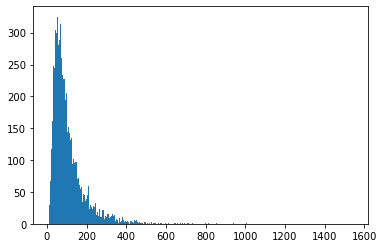

In [74]:
plt.hist(signal['Wlep1_mt']/1000, bins = 1000)
plt.show()

# 2D Scatterplot

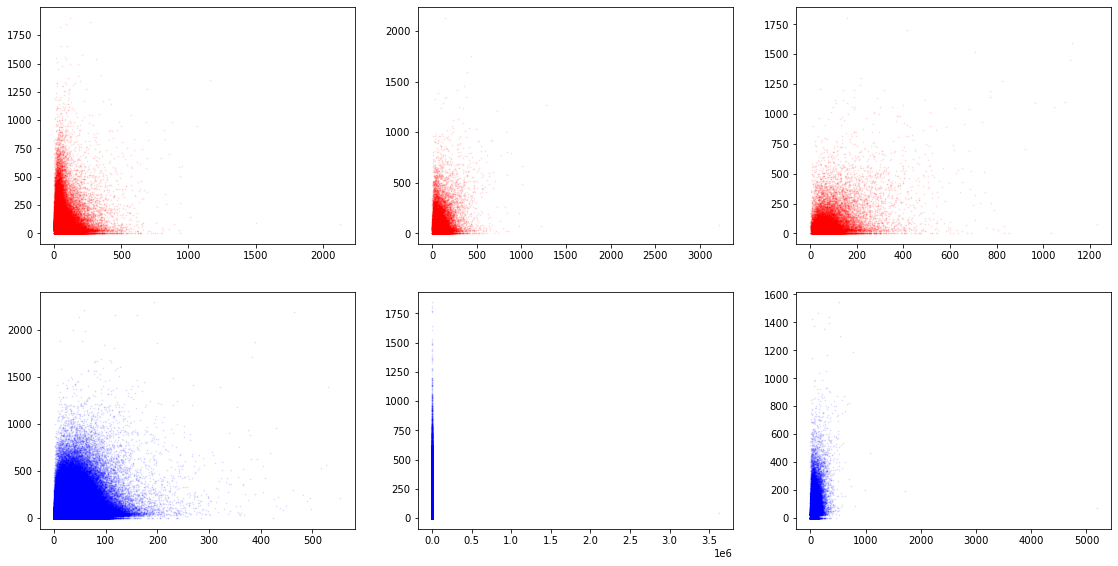

In [38]:
plt.figure(figsize=[3*6.4,2*4.8])


# variable_x, denom_x, my_range_x, my_bins_x = 'Zlep1_dphi', 1, (-3.5,3.5), 50 # Yes
# variable_y, denom_y, my_range_y, my_bins_y = 'Zlep2_dphi', 1, (-3.5,3.5), 50 # Yes

# variable_x, denom_x, my_range_x, my_bins_x = 'jet_eta_1', 1, (-10,5), 50
# variable_y, denom_y, my_range_y, my_bins_y = 'jet_eta_2', 1, (-10,5), 50

# variable_x, denom_x, my_range_x, my_bins_x = 'my_variable', 1000, (0,500), 50 
# variable_y, denom_y, my_range_y, my_bins_y = 'Njet', 1, (-0.5,10.5), 11 # Yes

variable_x, denom_x, my_range_x, my_bins_x = 'MET', 1000, (0,200), 50
variable_y, denom_y, my_range_y, my_bins_y = 'jet_pt_1', 1000, (0,300), 50



my_alpha = 0.1
my_log = False

for i in [0, 1, 2]:
    
    signal     = VVZ[VVZ.SR == i].copy()
    background = FULLBG[FULLBG.SR == i].copy()
    
    signal_yield = sum(signal['wgt'])
    background_yield = sum(background['wgt'])

  
    ax = plt.subplot(2, 3, i+1)
    
    # SIGNAL
    plt.scatter(x=signal[variable_x]/denom_x, y=signal[variable_y]/denom_y, s=0.5,
#                 range=[my_range_x, my_range_y], 
#                 bins=[my_bins_x, my_bins_y], 
                alpha=my_alpha, color='red', label='signal')
    
    ax = plt.subplot(2, 3, i+1+3)

#     # BACKGROUND
    plt.scatter(x=background[variable_x]/denom_x, y=background[variable_y]/denom_y, s=0.5,
#                 range=[my_range_x, my_range_y], 
#                 bins=[my_bins_x, my_bins_y], 
                alpha=my_alpha, color='blue', label='background')
    





    
#     plt.legend()
#     plt.xlabel(variable+' '+str(my_range))

#     if (my_log):
#         plt.yscale('log')
# #     plt.yscale('log')

#     plt.ylim(0)
#     plt.xlim(my_range)
plt.savefig('plots/2D_comparison_{}_vs_{}.pdf'.format(variable_y, variable_x))
plt.show()




(array([2.0691e+04, 1.0400e+02, 3.4000e+01, 1.5000e+01, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.52307528e-03, 6.18347578e+04, 1.23669516e+05, 1.85504266e+05,
        2.47339031e+05, 3.09173781e+05, 3.71008531e+05, 4.32843281e+05,
        4.94678062e+05, 5.56512812e+05, 6.18347562e+05], dtype=float32),
 <BarContainer object of 10 artists>)

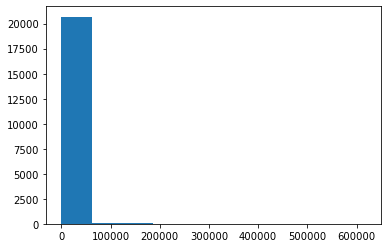

In [70]:
plt.hist(signal['chisq'])

In [20]:
1+1

2